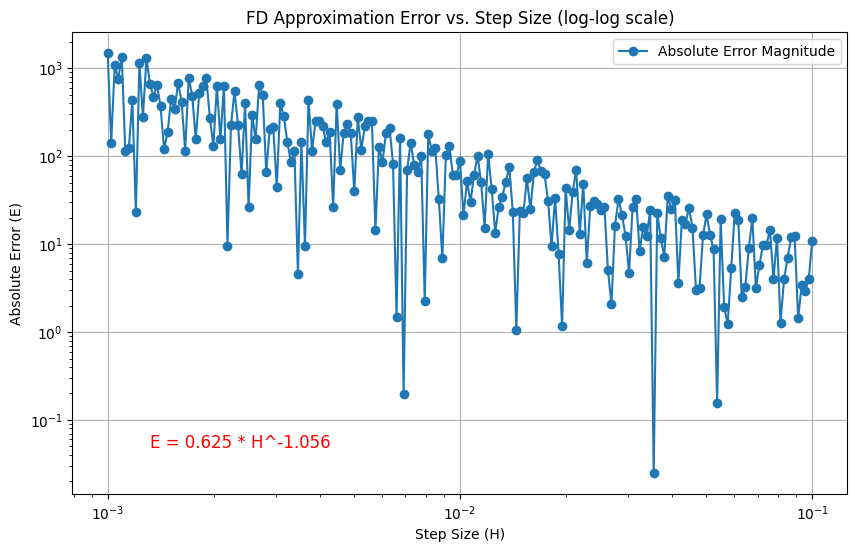

Fitted Coefficients: C = 0.625, p = -1.056


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function to numerically differentiate
def f(z):
    return np.exp(-z) * np.sin(z)

# Exact derivative
def exact_second_derivative(z):
    return np.exp(-z) * (np.sin(z) - 2 * np.cos(z))

Hval = []
errors = []

for k in range(100, 301):
    H = 10**(-k / 100)
    x1 = 0
    x4 = H
    x2 = np.random.uniform(0, H)
    x3 = np.random.uniform(0, H)

    # Calculate the FD approximation for f''(x2)
    df = (f(x1) - 2 * f(x2) + f(x3)) / H**2

    # Calculate the exact second derivative
    df_exact = exact_second_derivative(x2)

    # Calculate the absolute error
    error = abs(df - df_exact)

    # Append data points to the lists
    Hval.append(H)
    errors.append(error)

# Convert lists to NumPy arrays
H_values = np.array(Hval)
error_values = np.array(errors)

# Perform linear regression to fit the data to the E = Ch^p equation
log_H_values = np.log10(H_values)
log_error_values = np.log10(error_values)
coefficients = np.polyfit(log_H_values, log_error_values, 1)
#C, p = 10**coefficients[1], coefficients[0]

model = LinearRegression()
model.fit(log_H_values.reshape(-1, 1), log_error_values)
# Extract the coefficients
C = np.exp(model.intercept_)
p = model.coef_[0]

# Plot the data in log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(H_values, error_values, marker='o', linestyle='-', label='Absolute Error Magnitude')
plt.xlabel('Step Size (H)')
plt.ylabel('Absolute Error (E)')
plt.grid(True)
plt.title('FD Approximation Error vs. Step Size (log-log scale)')
plt.legend()

# Display the fitted equation and coefficients
plt.annotate(f'E = {C:.3f} * H^{p:.3f}', xy=(0.1, 0.1), xycoords='axes fraction', fontsize=12, color='red')

# Show the plot
plt.show()

# Print the fitted coefficients C and p
print(f"Fitted Coefficients: C = {C:.3f}, p = {p:.3f}")
